<a href="https://colab.research.google.com/github/HafizaMunshi/DRY-BEAN-CLASSIFICATION/blob/main/DRYBEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/MyDrive/Dry/Dry_Bean_Dataset - Altered.xlsx'

In [9]:
data=pd.read_excel('/content/drive/MyDrive/Dry/Dry_Bean_Dataset - Altered.xlsx')

# **DRY BEAN CLASSIFICATION**

In [10]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,NaN,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101.0,757.499,NaN,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [12]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13410.000000,13525.000000,13448.000000,13611.000000,13611.000000,13611.000000,13611.000000,13455.000000,13611.000000,13609.000000,13463.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53145.938777,855.214950,320.578938,202.270714,1.583242,0.750895,53768.200206,252.933374,0.749733,0.987142,0.873201,0.799864,0.006564,0.001716,0.643590,0.995063
std,29346.256142,214.595037,85.713797,44.970091,0.246678,0.092002,29774.915817,59.104456,0.049086,0.004661,0.059414,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36461.000000,703.317000,253.587883,175.848170,1.432307,0.715928,36714.500000,215.020637,0.718634,0.985670,0.832030,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44732.500000,794.885000,297.864031,192.431733,1.551124,0.764441,45178.000000,238.395303,0.759859,0.988283,0.883110,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61493.000000,977.030000,376.813482,217.031741,1.707109,0.810466,62294.000000,279.125062,0.786851,0.990013,0.916776,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13410 non-null  float64
 1   Perimeter        13525 non-null  float64
 2   MajorAxisLength  13448 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13455 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13609 non-null  float64
 10  roundness        13463 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# **DATA CLEANING**

In [40]:
data.isna

<bound method DataFrame.isna of           Area  Perimeter  ...  ShapeFactor4     Class
0      28395.0    610.291  ...      0.998724     SEKER
1      28734.0    638.018  ...      0.998430     SEKER
2      29380.0    624.110  ...      0.999066     SEKER
3      30008.0    645.884  ...      0.994199     SEKER
4      30140.0    620.134  ...      0.999166     SEKER
...        ...        ...  ...           ...       ...
13606  42097.0    759.696  ...      0.998385  DERMASON
13607  42101.0    757.499  ...      0.998219  DERMASON
13608  42139.0    759.321  ...      0.996767  DERMASON
13609  42147.0    763.779  ...      0.995222  DERMASON
13610  42159.0    772.237  ...      0.998180  DERMASON

[13611 rows x 17 columns]>

In [18]:
data.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data['Solidity']=data['Solidity'].replace(np.NaN,data['Solidity'].mean())

In [20]:
data['roundness']=data['roundness'].replace(np.NaN,data['roundness'].mean())

In [21]:
data['Compactness']=data['Compactness'].replace(np.NaN,data['Compactness'].mean())

In [22]:
data['ShapeFactor1']=data['ShapeFactor1'].replace(np.NaN,data['ShapeFactor1'].mean())

In [23]:
data['ShapeFactor2']=data['ShapeFactor2'].replace(np.NaN,data['ShapeFactor2'].mean())

In [24]:
data['ShapeFactor3']=data['ShapeFactor3'].replace(np.NaN,data['ShapeFactor3'].mean())

In [25]:
data['ShapeFactor4']=data['ShapeFactor4'].replace(np.NaN,data['ShapeFactor4'].mean())

# **EDA**

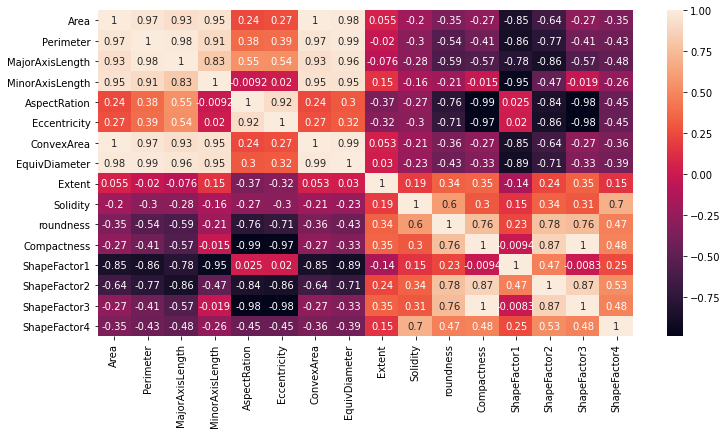

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

In [71]:
x=data[['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','ShapeFactor1']]
y=data['Class']

In [72]:
data.fillna(data.mean())

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.873201,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13605,42070.0,760.701,276.691651,193.945366,1.426647,0.713216,42458,231.441543,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.699666,0.998176,DERMASON
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=101)

# **SVM ALGORITHM**

In [76]:
from sklearn.svm import SVC

model = SVC()

In [77]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
predictions = model.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions))

[[299   0  44   0   1   2  16]
 [  0 158   0   0   0   0   0]
 [  9   1 449   0  19   1   8]
 [  0   0   0 909   0  22  55]
 [  2   0  13   5 496   0  37]
 [  6   0   0  16   0 500  39]
 [  1   0   0  74  13  12 696]]


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.83      0.88       362
      BOMBAY       0.99      1.00      1.00       158
        CALI       0.89      0.92      0.90       487
    DERMASON       0.91      0.92      0.91       986
       HOROZ       0.94      0.90      0.92       553
       SEKER       0.93      0.89      0.91       561
        SIRA       0.82      0.87      0.85       796

    accuracy                           0.90      3903
   macro avg       0.92      0.90      0.91      3903
weighted avg       0.90      0.90      0.90      3903



# DECISION TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
pred_dtree = d_tree.predict(X_test)

In [65]:
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

    BARBUNYA       0.82      0.83      0.83       362
      BOMBAY       1.00      1.00      1.00       158
        CALI       0.90      0.85      0.87       487
    DERMASON       0.87      0.89      0.88       986
       HOROZ       0.88      0.92      0.90       553
       SEKER       0.91      0.89      0.90       561
        SIRA       0.82      0.80      0.81       796

    accuracy                           0.87      3903
   macro avg       0.88      0.88      0.88      3903
weighted avg       0.87      0.87      0.87      3903



In [66]:
print(confusion_matrix(y_test, pred_dtree))

[[301   0  36   0   9   7   9]
 [  0 158   0   0   0   0   0]
 [ 45   0 414   0  17   2   9]
 [  0   0   0 875  19  20  72]
 [  5   0   6   4 509   0  29]
 [  7   0   0  27   0 502  25]
 [  9   0   4 100  25  23 635]]


# **RANDOM FOREST**

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()

In [83]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
pred_rf = rfc.predict(X_test)

In [85]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.86      0.88       362
      BOMBAY       1.00      1.00      1.00       158
        CALI       0.92      0.89      0.91       487
    DERMASON       0.89      0.91      0.90       986
       HOROZ       0.93      0.94      0.93       553
       SEKER       0.93      0.92      0.93       561
        SIRA       0.85      0.86      0.85       796

    accuracy                           0.90      3903
   macro avg       0.92      0.91      0.91      3903
weighted avg       0.90      0.90      0.90      3903

